# Geometric Brownian Motion, Estimation, and Jump Diffusion Option Pricing

This notebook explores several key topics in stochastic processes and financial mathematics:

- **Problem 1:** Simulation and analysis of the geometric Brownian motion (GBM) wealth process, including its expected value, probability calculations, and long-term behavior.
- **Problem 2:** Statistical estimation of drift ($\mu$) and volatility ($\sigma$) from simulated returns, examining the effect of sampling interval ($\Delta$) on estimator bias and variance.
- **Problem 3:** Monte Carlo pricing of European options under both the Black-Scholes model and Merton's jump diffusion model, including comparison of results and discussion of the impact of jumps on option prices.

The notebook combines mathematical derivations, simulation code, and graphical analysis to provide a comprehensive understanding of these models and their implications in quantitative finance.

In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.stats import norm, binom
from scipy.special import ndtri

## Problem 1
i.
\begin{equation}
dV_{t} = \mu V_{t}dt + \sigma dW_{t}
\end{equation}

\begin{equation}
V_{t} = V_{0}e^{(\mu-\frac{\sigma^{2}}{2})t + \sigma W_{t}}
\end{equation}

\begin{equation}
E[V_{t}]= E[V_{0}e^{(\mu-\frac{\sigma^{2}}{2})t + \sigma W_{t}}]
\end{equation}

\begin{equation}
E[V_{t}]= V_{0}e^{(\mu-\frac{\sigma^{2}}{2})t} E[e^{ \sigma W_{t}}]
\end{equation}

moment generating function:
\begin{equation}
E[e^{uX}] = e^{\frac{1}{2}u^{2}\sigma^{2}}
\end{equation}

\begin{equation}
E[e^{ \sigma W_{t}}] = e^{\frac{1}{2}\sigma^{2} t}
\end{equation}

\begin{equation}
E[V_{t}]= V_{0}e^{(\mu-\frac{\sigma^{2}}{2})t} e^{\frac{1}{2}\sigma^{2} t}
\end{equation}

\begin{equation}
E[V_{t}]= V_{0}e^{\mu t}
\end{equation}


iv.
<br>
\begin{equation}
V_{t} = V_{0}e^{(\mu-\frac{\sigma^{2}}{2})t + \sigma W_{t}}
\end{equation}

\begin{equation}
E[V_{t}]= V_{0}e^{\mu t}
\end{equation}

\begin{equation}
\mathbb{P} (V_{0}e^{(\mu-\frac{\sigma^{2}}{2})T + \sigma W_{T}} \leq \alpha V_{0}e^{\mu T})
\end{equation}

\begin{equation}
\mathbb{P} (e^{\frac{-\sigma^{2}}{2}T + \sigma W_{T}} \leq \alpha)
\end{equation}

\begin{equation}
\mathbb{P} ( W_{T} \leq \frac{ln(\alpha) + \frac{\sigma^{2}}{2}T}{\sigma})
\end{equation}

\begin{equation}
W_{T} = Z_{T} \sqrt{T}
\end{equation}

\begin{equation}
\mathbb{P} ( Z_{T} \leq \frac{ln(\alpha) + \frac{\sigma^{2}}{2}T}{\sigma \sqrt{T}})
\end{equation}
<br>
<br>
v.
<br>
The probability:

$\mathbb{P}(V_{T} \leq \alpha \mathbb{E}[V_{T}])$ 
converges to 1 as T $\rightarrow$ $\infty$.
<br>
<br>
vi.
<br>
Yes 

$\mathbb{E}[V_{T}]$ goes to infinity as T $\rightarrow$ $\infty$, but the long-run behavior of each $V_{T}$ goes to 0 and is underneath $\mathbb{E}[V_{T}]$ with probability 1. 

In [18]:
def wealth_process(mu, sigma, r, T, n, m, V0):
    zs = np.random.standard_normal((n,m))
    dt = T/m
    W_ts = zs*np.sqrt(dt)
    V = V0
    V_ts = []
    exp_Vs = []
    for i in range(m):
        V_t = V*np.exp((mu-(sigma**2)/2)*dt + sigma*W_ts[:,i])
        V=V_t
        V_ts.append(V_t)
        exp_V = V0*np.exp((i+1)*dt*mu) 
        exp_Vs.append(exp_V)
    V_ts = np.array(list(map(list,zip(*V_ts))))
    
    
    return V_ts, exp_Vs

In [19]:
def graph_brownian_motion(wealth_process_matrix):
    plt.xlabel('Steps')
    plt.ylabel('Wealth Process Value')
    plt.title("Geometric Brownian Motion")
    for i in wealth_process_matrix: plt.plot(i)
    plt.show()

In [20]:
V0 = 10
mu = .08
r = .03
sigma = .2
T = 30
n = 50
m = 2000
w = wealth_process(mu, sigma, r, T, n, m, V0)

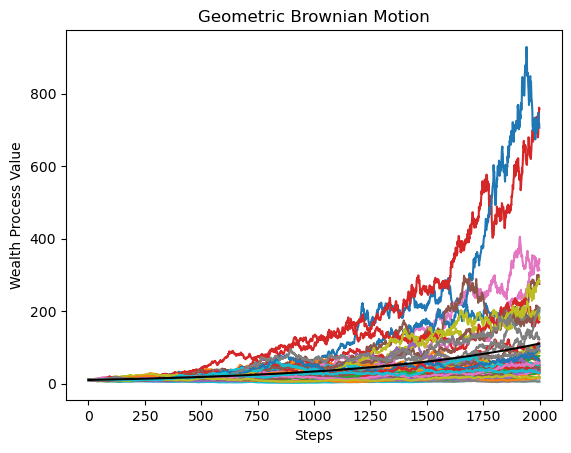

In [21]:
plt.xlabel('Steps')
plt.ylabel('Wealth Process Value')
plt.title("Geometric Brownian Motion")
for i in w[0]: plt.plot(i)
plt.plot(w[1], color ='Black')
plt.show()

In [22]:
V0 = 10
mu = .08
r = .03
sigma = .2
T = 30
n = 10000
m = 2000
alphas=np.arange(.1,1.1,.1)
w = wealth_process(mu, sigma, r, T, n, m, V0)

In [23]:
def probability(wealth_process, alphas, m, n):
    probs_alpha = []
    upper_CIs_alpha = []
    lower_CIs_alpha = []
    for alpha in alphas:   
        probs = []
        upper_CIs=[]
        lower_CIs=[]
        for j in range(len(wealth_process[1])):
            comp_level = alpha*wealth_process[1][j]
            prob = (np.where(wealth_process[0][:,j] <= comp_level,1,0).cumsum()[-1])/len(wealth_process[0])
            probs.append(prob)
            var = np.var(wealth_process[0][:,j])
            upper_CI = prob + np.sqrt(prob*(1-prob)/n)*1.96
            lower_CI = prob - np.sqrt(prob*(1-prob)/n)*1.96
            upper_CIs.append(upper_CI)
            lower_CIs.append(lower_CI)
        probs_alpha.append(probs[m-1])
        upper_CIs_alpha.append(upper_CIs[m-1])
        lower_CIs_alpha.append(lower_CIs[m-1])
    d = {'Probability below E[V] at step m' :probs_alpha, 'Upper_CI' : upper_CIs_alpha, 'Lower_CI' : lower_CIs_alpha}
    df = pd.DataFrame(d, index= alphas)    
    return df

In [24]:
probability(w,alphas,2000,n)

,Probability below E[V] at step m,Upper_CI,Lower_CI
0.1,0.0612,0.065898,0.056502
0.2,0.1799,0.187428,0.172372
0.3,0.2912,0.300105,0.282295
0.4,0.3855,0.395040,0.375960
0.5,0.4671,0.476879,0.457321
0.6,0.5343,0.544077,0.524523
0.7,0.5878,0.597448,0.578152
0.8,0.6350,0.644436,0.625564
0.9,0.6737,0.682890,0.664510
1.0,0.7112,0.720083,0.702317


## Problem 2

d.
<br>
i.
<br>
Both $\hat{\mu}$ and $\hat{\sigma}$ are unbiased estimators. $\Delta$ has no impact on the means $\hat{\mu}$ and $\hat{\sigma}$. 
<br>
<br>
ii.
<br>
The standard deviation of $\hat{\mu}$ is not effected by $\Delta$ (I think it is, but the effect is so small and you need so many samples that it is not observable), but the standard deviation of $\hat{\sigma}$ decreases as $\Delta$ decreases leading to lower variance with more samples. 
<br>
<br>
iii.
<br>
$\hat{\mu}$ has quite a high standard deviation, similar to the mean value itself so it is not a great estimator. $\hat{\sigma}$ provides a better estimate, especially as $\Delta$ decreases. This is due to the mean blur as we do not have enough data points to get a good estimator of the mean and because the standard deviation of the generate r.v. is greater than the mean of the r.v.

In [25]:
def sim_returns(mu, sigma, T, delta, n):
    m = int(T/delta)
    #zs = np.random.standard_normal((n,m))
    #rs = mu*delta+ np.sqrt((sigma**2)*delta)*zs
    rs = np.random.normal(mu*delta,np.sqrt((sigma**2)*delta), size = (n,m))
    mu_ests = np.mean(rs, axis = 1)/delta
    sig_ests = np.std(rs,ddof=1, axis = 1)/np.sqrt(delta)
    return mu_ests, sig_ests

In [26]:
mu = .12
sigma = .16
T=2
N=1000
deltas = [1/12,1/52,1/252]
mu_ests = []
sig_ests = []
for delta in deltas:
    res = sim_returns(mu, sigma, T, delta, n)
    mu_ests.append(res[0])
    sig_ests.append(res[1])

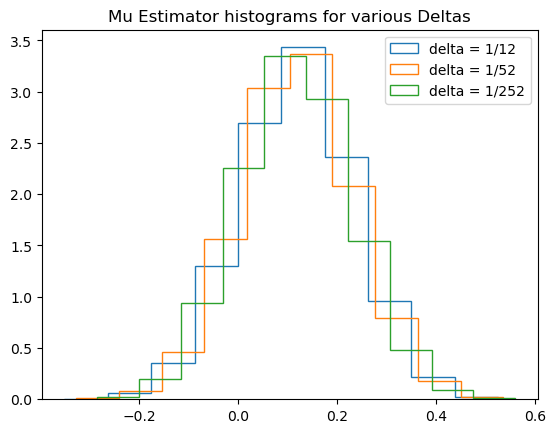

In [27]:
plt.hist(mu_ests[0], histtype = 'step', label = 'delta = 1/12', density = True)
plt.hist(mu_ests[1], histtype='step', label = 'delta = 1/52', density = True)
plt.hist(mu_ests[2], histtype= 'step', label = 'delta = 1/252', density = True)
plt.legend()
plt.title('Mu Estimator histograms for various Deltas')
plt.show()

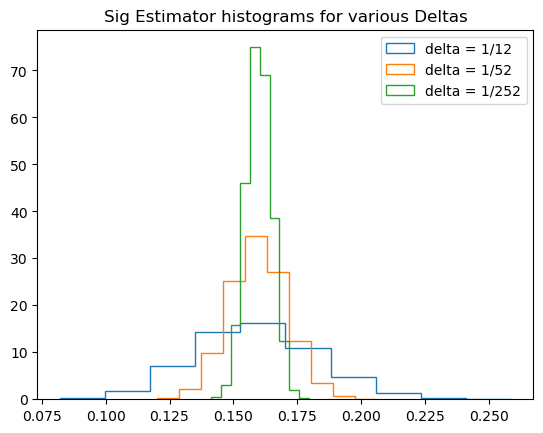

In [28]:
plt.hist(sig_ests[0], histtype = 'step', label = 'delta = 1/12', density = True)
plt.hist(sig_ests[1], histtype='step', label = 'delta = 1/52', density = True)
plt.hist(sig_ests[2], histtype= 'step', label = 'delta = 1/252', density = True)
plt.legend()
plt.title('Sig Estimator histograms for various Deltas')
plt.show()

In [29]:
mu_means = np.mean(mu_ests, axis = 1)
mu_stds = np.std(mu_ests, ddof= 1, axis = 1)
sig_means = np.mean(sig_ests, axis = 1)
sig_stds = np.std(sig_ests, ddof= 1, axis = 1)
d = {'Mu Mean': mu_means, 'Mu Std': mu_stds, 'Sig Mean': sig_means, 'Sig Std': sig_stds}
table = pd.DataFrame(d, index = ['delta = 1/12', 'delta = 1/52','delta = 1/252'])

In [30]:
table

,Mu Mean,Mu Std,Sig Mean,Sig Std
delta = 1/12,0.119080,0.114804,0.158485,0.023587
delta = 1/52,0.120710,0.113261,0.159710,0.011190
delta = 1/252,0.117777,0.114282,0.159906,0.005051


## Problem 3

a.
<br>
You can simulate U~U[0,1] and then map this to the inverse CDF of $N_{T}$ to arrive at a number k for the number of jumps. So maybe .1 is the value of k = 0, and .05 is the value for k=1 and so on. Then if you simulate a uniform r.v. and you get 0-.1 then you have 0 jumps, .1-.15 corresponds to 1 jump and so on and so forth.
<br>
<br>

b.
<br>
More expensive for both calls and puts because the jumps add an increase of volatility. so a lambda greater than 0 will add volatility to the model so this model will price both calls and puts higher than the black scholes formula and the standard monte carlo counterpart.
<br>
<br>
d.
<br>
Yes they line up.

In [31]:
def jump_diffusion_euro_option(S0, K, sigma, T, r, mu_j, sig_j, lam, n, option_type ='call'):
    k = np.exp(mu_j +(sig_j**2)/2)-1
    zs = np.random.standard_normal(n)
    W_Ts = zs*np.sqrt(T)
    N_s = np.random.poisson(lam*T, size = n)
    J_s = np.random.lognormal(mu_j, sig_j, N_s.cumsum()[-1])
    J_vec =[]
    for div in N_s:
        j_seg = J_s[:div]
        j = np.prod(j_seg)
        J_vec.append(j)
        J_s = J_s[div:]
    S_Ts = S0*np.exp((r-lam*k-(sigma**2)/2)*T +sigma*W_Ts)*J_vec
    if option_type == 'call':
        V_Ts = np.maximum(S_Ts-100, 0)
    else:
        V_Ts = np.maximum(100-S_Ts, 0)
    V_0s = np.exp(-r*T)*V_Ts
    
    option_price = np.mean(V_0s)
    sample_var = np.var(V_0s, ddof = 1)
    CI = [option_price - 1.96*np.sqrt(sample_var/n),option_price + 1.96*np.sqrt(sample_var/n)]
    return option_price, CI


def black_scholes(S_0, sigma, r, T, K, option_type='call'):
    d1 = (np.log(S_0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    gamma = norm.pdf(d1)/(S_0*sigma*np.sqrt(T))

    if option_type == 'call':
        option_price = S_0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        delta = norm.cdf(d1)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S_0 * norm.cdf(-d1)
        delta = norm.cdf(d1) - 1
    else:
        raise ValueError("Option type must be 'call' or 'put'.")

    return option_price, d1,d2, delta, gamma


def monte_carlo_euro_option_vectorization(S_0, sigma, r, T, K, n, option_type = 'call'):
    zs = np.random.standard_normal(n)
    W_Ts = np.sqrt(T)*zs
    S_Ts = S_0*np.exp((r-(sigma**2)/2)*T + sigma*W_Ts)
    zeros = np.zeros(n)
    if option_type == 'call':
        V_Ts = np.maximum(zeros, S_Ts-K)
    else:
        V_Ts = np.maximum(zeros, K-S_Ts)
    V_0s = np.exp(-r*T)*np.array(V_Ts)
    option_price = np.mean(V_0s)
    sample_var = np.var(V_0s, ddof = 1)
    CI = [option_price - 1.96*np.sqrt(sample_var/n),option_price + 1.96*np.sqrt(sample_var/n)]
    return option_price, CI, V_0s, S_Ts


In [32]:
S0 = 100
K = 100
T = 1
r = .03
sigma = .2
mu_j = .02
sig_j = .08
n= 10000000
lam = 0
option_type = 'call'
jump_diffusion_euro_option(S0, K, sigma, T, r, mu_j, sig_j, lam, n, option_type)

(9.419203914982731, [9.410455576509788, 9.427952253455674])

In [33]:
monte_carlo_euro_option_vectorization(S0, sigma, r, T, K, n, option_type = 'call')

(9.410900417466486,
 [9.402158801491561, 9.419642033441411],
 array([65.67651401, 14.54128262,  0.        , ...,  0.        ,
        42.40184498,  0.        ]),
 array([167.67666164, 114.98413061,  79.43511581, ...,  93.4455279 ,
        143.69317341,  97.57313362]))

In [34]:
black_scholes(S0, sigma, r, T, K, option_type='call')

(9.413403383853016,
 0.25,
 0.04999999999999999,
 0.5987063256829237,
 0.019333405840142464)

In [35]:
S0 = 100
K = 100
T = 1
r = .03
sigma = .2
mu_j = .02
sig_j = .08
n= 10000
lams = [0,2]
option_types = ['call', 'put']
prices = []
CIs = []
for lam in lams:
    for option_type in option_types:
        res = jump_diffusion_euro_option(S0, K, sigma, T, r, mu_j, sig_j, lam, n, option_type)
        prices.append(res[0])
        CIs.append(res[1])
d = {'Price' : prices, '95% Confidence Interval' : CIs}        
table = pd.DataFrame(d, index= ['Call, Lambda = 0', 'Put, Lambda = 0','Call, Lambda = 2','Put, Lambda = 2'])

In [36]:
table

,Price,95% Confidence Interval
"Call, Lambda = 0",9.029892,"[8.761923599481236, 9.29785986414079]"
"Put, Lambda = 0",6.367996,"[6.186039900850021, 6.549952286883688]"
"Call, Lambda = 2",10.381820,"[10.05638190371737, 10.707258654914064]"
"Put, Lambda = 2",7.505089,"[7.297693881631956, 7.712484809057527]"
